In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=',')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
student_por['failures'] = student_por['failures'].astype(float)
student_por['absences'] = student_por['absences'].astype(float)
student_por['G1'] = student_por['G1'].astype(float)
student_por['G2'] = student_por['G2'].astype(float)
student_por['G3'] = student_por['G3'].astype(float)

In [5]:
student_por['Medu'] = student_por['Medu'].astype(object)
student_por['Fedu'] = student_por['Fedu'].astype(object)
student_por['traveltime'] = student_por['traveltime'].astype(object)
student_por['studytime'] = student_por['studytime'].astype(object)
student_por['famrel'] = student_por['famrel'].astype(object)
student_por['freetime'] = student_por['freetime'].astype(object)
student_por['goout'] = student_por['goout'].astype(object)
student_por['Dalc'] = student_por['Dalc'].astype(object)
student_por['Walc'] = student_por['Walc'].astype(object)
student_por['health'] = student_por['health'].astype(object)

In [6]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    object 
 7   Fedu        649 non-null    object 
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    object 
 13  studytime   649 non-null    object 
 14  failures    649 non-null    float64
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [7]:
objDF = pd.DataFrame(student_por.select_dtypes(include=['object']))
objDF

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,1,3
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,1,3
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,2,3,3
3,GP,F,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,1,1,5
4,GP,F,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,2,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3,services,other,course,...,no,yes,yes,no,5,4,2,1,2,5
645,MS,F,U,LE3,T,3,1,teacher,services,course,...,yes,yes,yes,no,4,3,4,1,1,1
646,MS,F,U,GT3,T,1,1,other,other,course,...,yes,yes,no,no,1,1,1,1,1,5
647,MS,M,U,LE3,T,3,1,services,services,course,...,no,yes,yes,no,2,4,5,3,4,2


In [8]:
numDF = pd.DataFrame(student_por.select_dtypes(include=['int64', 'float64']))
numDF

,age,failures,absences,G1,G2,G3
0,18,0.0,4.0,0.0,11.0,11.0
1,17,0.0,2.0,9.0,11.0,11.0
2,15,0.0,6.0,12.0,13.0,12.0
3,15,0.0,0.0,14.0,14.0,14.0
4,16,0.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...
644,19,1.0,4.0,10.0,11.0,10.0
645,18,0.0,4.0,15.0,15.0,16.0
646,18,0.0,6.0,11.0,12.0,9.0
647,17,0.0,6.0,10.0,10.0,10.0


In [9]:
new_por = pd.DataFrame()

for obj in objDF:
    col = objDF[obj].unique()
    for i in col:
        new_por[obj+" "+str(i)] = (objDF[obj]==i).replace({True:'1', False: '0'})
        new_por[obj+" "+str(i)] = (objDF[obj]==i).astype(int)
        
for num in numDF:
    new_por[num] = numDF[num]
        
new_por

,school GP,school MS,sex F,sex M,address U,address R,famsize GT3,famsize LE3,Pstatus A,Pstatus T,...,health 5,health 1,health 2,health 4,age,failures,absences,G1,G2,G3
0,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,18,0.0,4.0,0.0,11.0,11.0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,17,0.0,2.0,9.0,11.0,11.0
2,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,15,0.0,6.0,12.0,13.0,12.0
3,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,15,0.0,0.0,14.0,14.0,14.0
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,16,0.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,0,1,1,0,0,1,...,1,0,0,0,19,1.0,4.0,10.0,11.0,10.0
645,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,18,0.0,4.0,15.0,15.0,16.0
646,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,18,0.0,6.0,11.0,12.0,9.0
647,0,1,0,1,1,0,0,1,0,1,...,0,0,1,0,17,0.0,6.0,10.0,10.0,10.0


In [10]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [11]:
pred, G3 = new_por.iloc[:,:-1],new_por.iloc[:,-1]

In [12]:
data_dmatrix = xgb.DMatrix(data=pred,label=G3)

In [13]:
from sklearn.model_selection import train_test_split

pred_train, pred_test, G3_train, G3_test = train_test_split(pred, G3, test_size=0.25, random_state=123)

Random state is assigned to ensure reproducibility of results.

In [14]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [15]:
xg_reg.fit(pred_train,G3_train)

preds = xg_reg.predict(pred_test)

[14:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
rmse = np.sqrt(mean_squared_error(G3_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.710669


In [17]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.718472,0.117928,10.718378,0.236148
1,9.698652,0.087627,9.710406,0.233810
2,8.772537,0.081619,8.793866,0.205582
3,7.967585,0.046827,8.005999,0.213406
4,7.234507,0.052663,7.268113,0.186146


In [19]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1.434593
Name: test-rmse-mean, dtype: float64


In [20]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
!pip install graphviz

In [22]:
#!pip install pydot 
#!pip install pydotplus

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

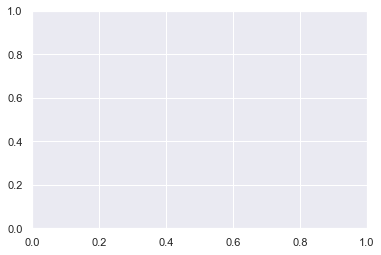

In [23]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()